In [22]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/supp_validation/'

Populating the interactive namespace from numpy and matplotlib


In [23]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    
    folder = 't23'
    fig_num = 0
    pers = [3] 
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','purple']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT','0.0','1.0']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    '''
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    '''
    color_dic_motif['0.0'] = 'black'
    color_dic_motif['1.0'] = 'red'
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
             
    dic_means = {}
    dic_legend = {}
    dic_diff_min = {}
    dic_diff_max = {}
    dic_num_loci = {}

    motifs = ['0.0','1.0']
    for per in pers:
        dic_means[per] = {}
        dic_legend[per] = {}
        dic_diff_min[per] = {}
        dic_diff_max[per] = {}
        dic_num_loci[per] = {}
        for motif in motifs:
            dic_means[per][motif] = [-1] * len(opt_dic[per])
            dic_legend[per][motif] = opt_dic[per]
            dic_diff_min[per][motif] = [0] * len(opt_dic[per])
            dic_diff_max[per][motif] = [0] * len(opt_dic[per])
            dic_num_loci[per][motif] = [0] * len(opt_dic[per])
   
    spacing = 8
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        minimum = 100
        maximum = -100
        opt_alleles = opt_dic[per]
        print('Running period: %d'%(per))
        
        list_of_mean = []
        errors = []
        legend_labels = []
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_7_*opt_%s.txt'%(folder, per, opt_string) )
            file_list.sort() 
        
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[1])
                
                if num_acc > 0 and num_loci >= 10:
                    line = lines[12]
                    info = line.strip().split(': ')
                    mean_value = float(info[1])
                    line = lines[13]
                    info = line.strip().split(': ')
                    upper_mean_value = float(info[1])
                    line = lines[14]
                    info = line.strip().split(': ')
                    lower_mean_value = float(info[1])
                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    line = lines[11]
                    info = line.strip().split(',')
                    k = float(info[0])
                    theta = float(info[1])
                     
                    line = lines[15]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    #print(params)
                    params_list = []
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[0])), float(param[1])))
                    sorted_params = sorted(params_list, key=lambda x: x[0]*x[1])
                    #print(sorted_params)
                    num_accepted = len(sorted_params)
                    print(num_accepted)
                    list_acc = list(range(0,num_accepted))
                    #print(list_acc)
                    middle_index = int(num_accepted/2)
                        
                    lower_index = int(np.percentile(list_acc, 2.5))
                        
                    upper_index = int(np.percentile(list_acc, 97.5))
                        
                    indices = [lower_index, middle_index, upper_index]
                    for index in indices:
                        svals = GetGammaBins(sorted_params[index][0], sorted_params[index][1])
                        lab = 'Noncoding'
                        if motif == '1.0':
                            lab = 'Coding'
                        # Plot discrete pdf of gamma distribution
                        fig_num = fig_num + 1
                        plt.figure(fig_num)
                        x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
                        y_pos = np.arange(len(x))
                        barWidth = 0.2
                        r1 = np.arange(len(x))
                        if lab == 'Coding':
                            plt.bar(r1, svals, color='red', width=barWidth) 
                        else:
                            plt.bar(r1, svals, color='black', width=barWidth) 
                        plt.xticks([r + barWidth/2 for r in range(len(x))], x)
                        plt.xticks(rotation=15) 
                        plt.xlabel("S value")
                        plt.ylabel("Probability")
                        
                        plt.title("Per %d Opt %d %s\nGamma Distribution k=%.5f; theta=%.5f\nMean %.2E"%(per, opt, lab, sorted_params[index][0], sorted_params[index][1], sorted_params[index][0]*sorted_params[index][1])) 
                        plt.show()


Running main
Running period: 3
3424


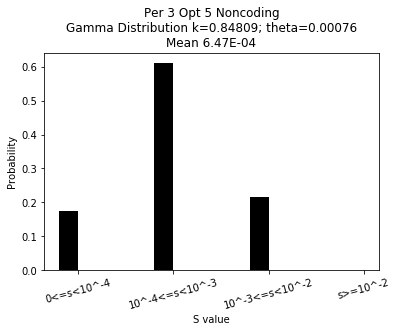

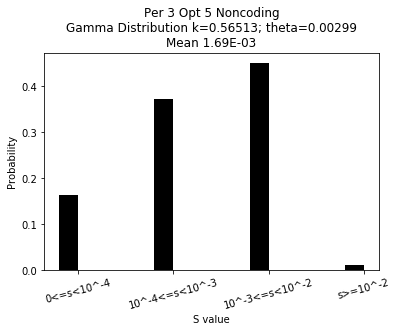

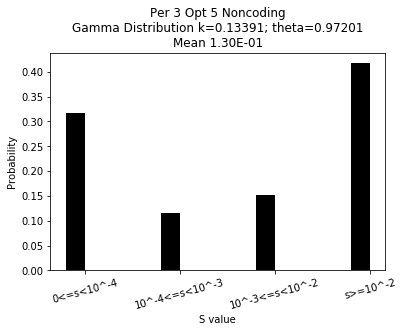

3164


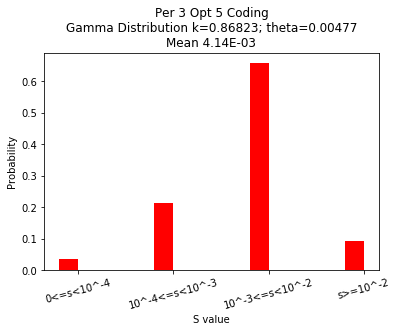

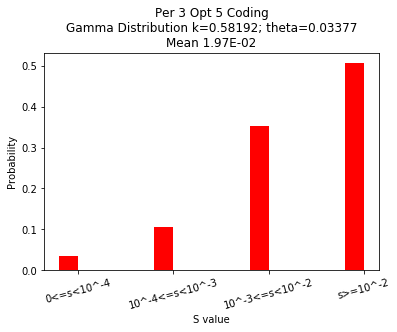

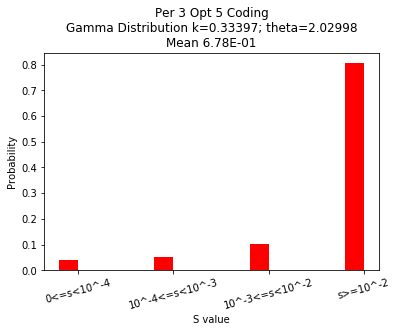

906


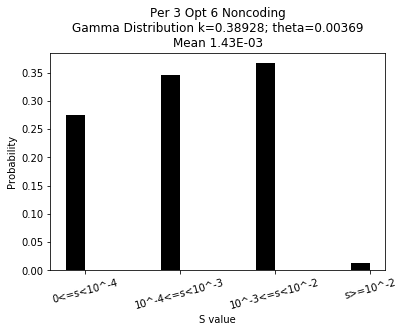

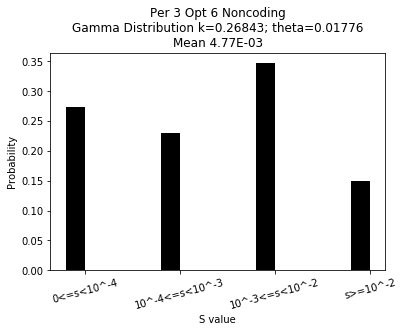

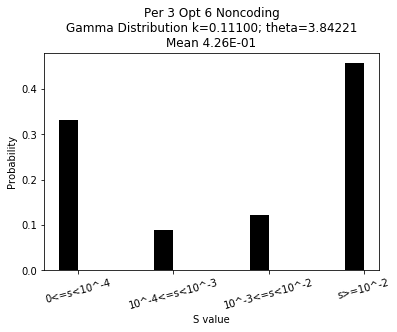

1560


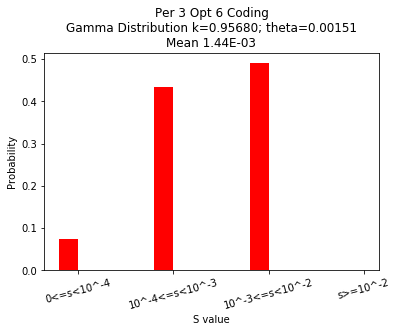

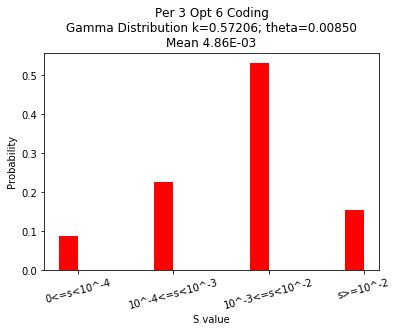

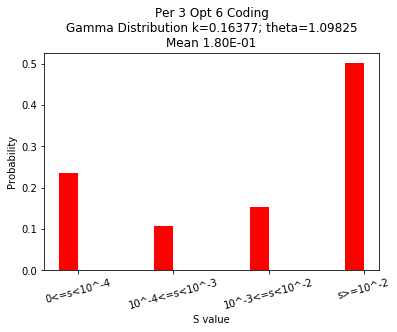

429


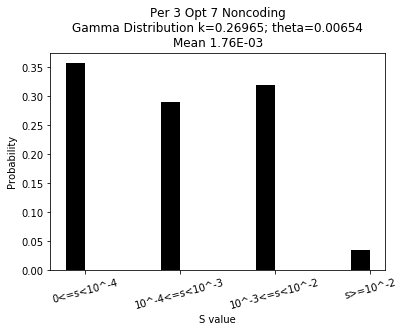

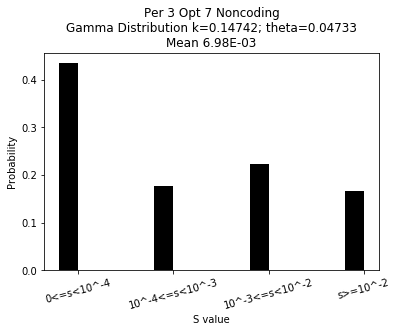

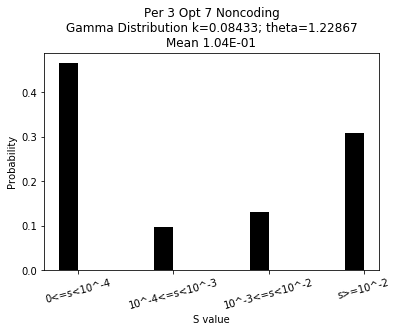

349


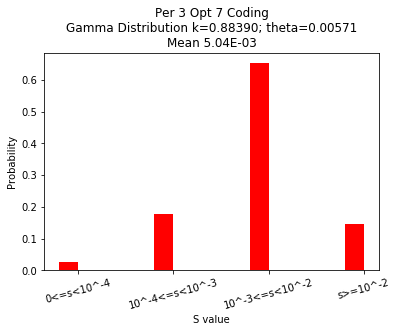

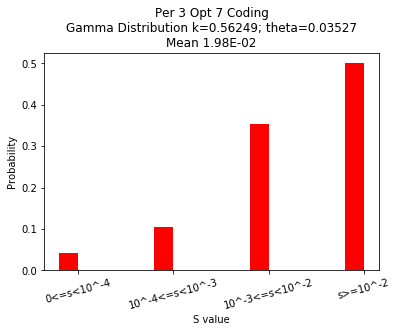

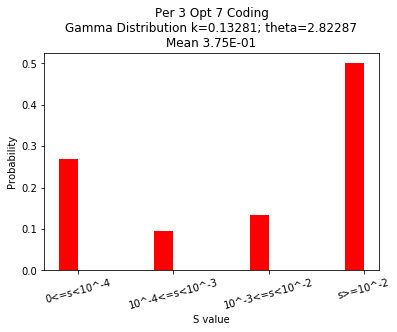

284


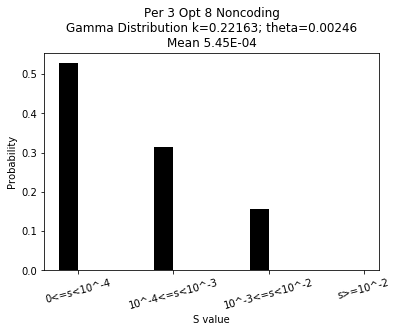

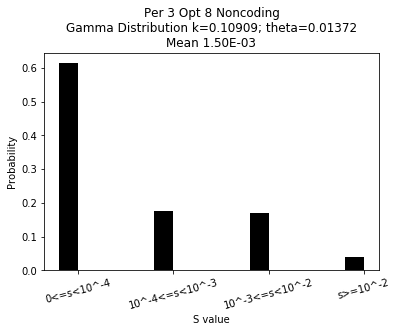

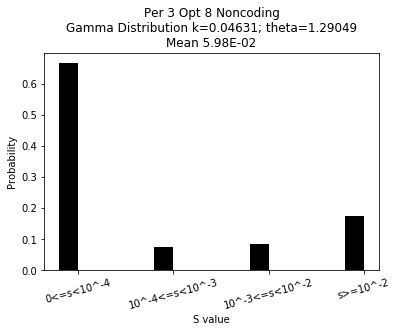

20


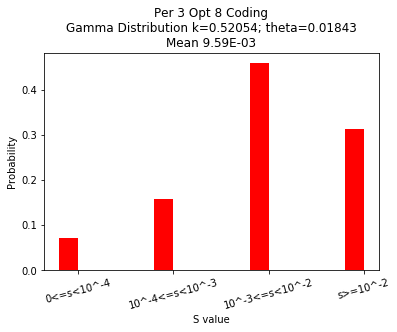

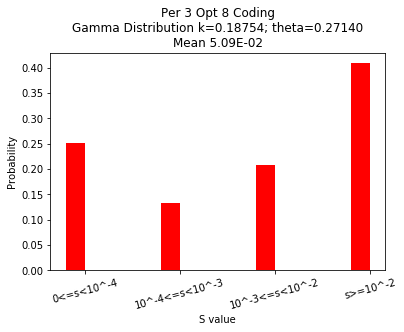

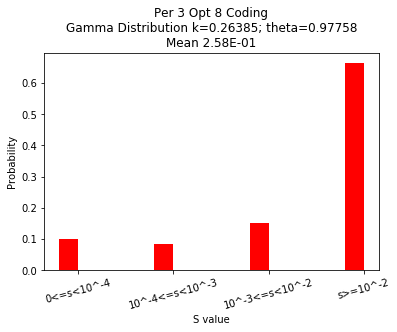

170


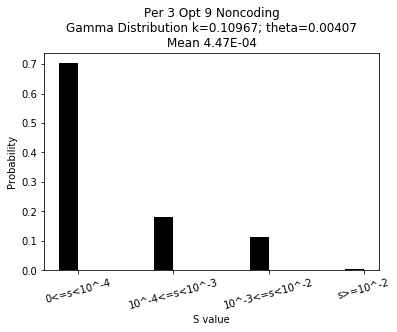

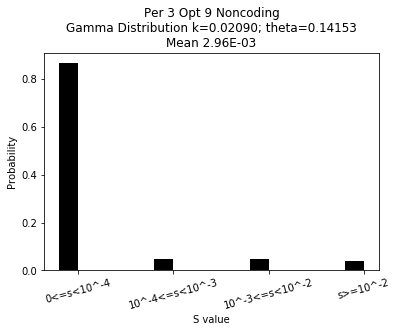

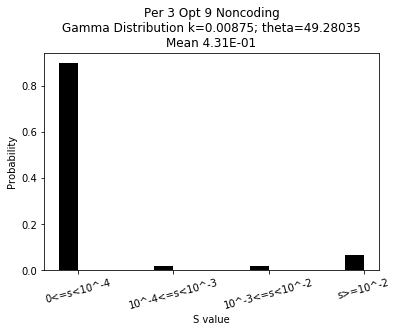

62


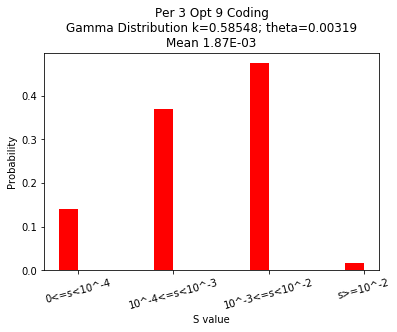

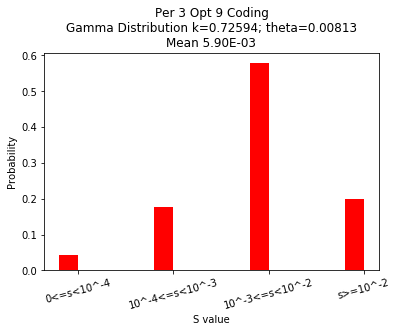

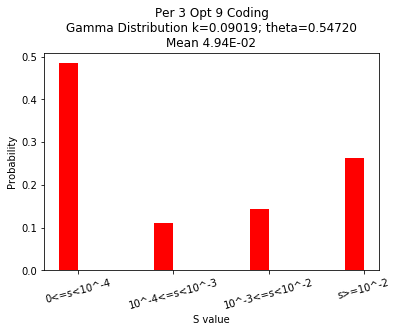

153


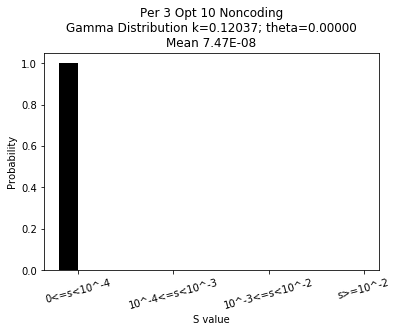

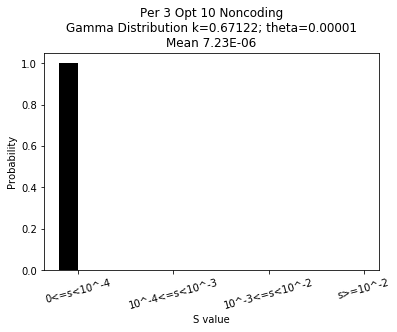

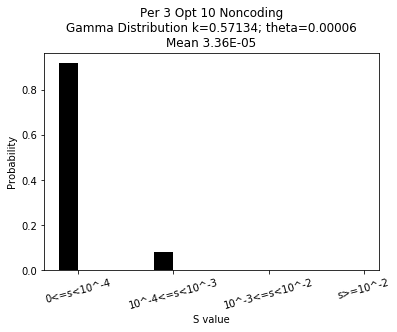

71


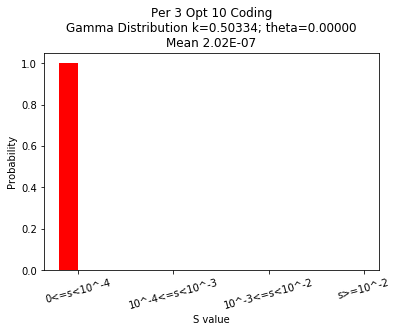

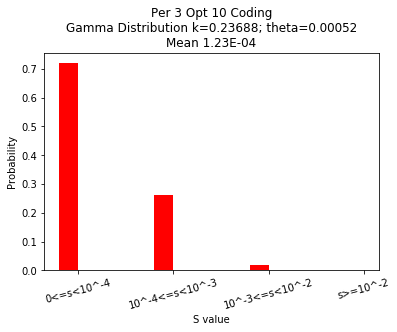

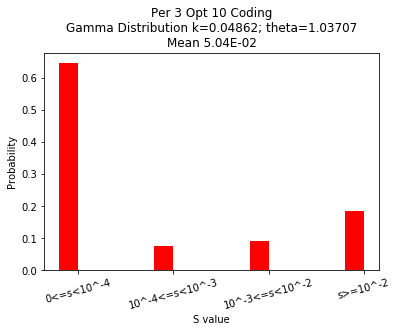

468


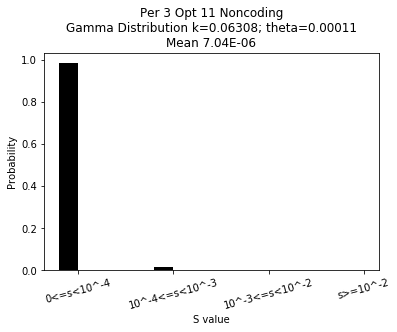

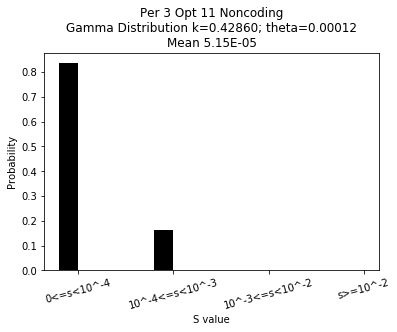

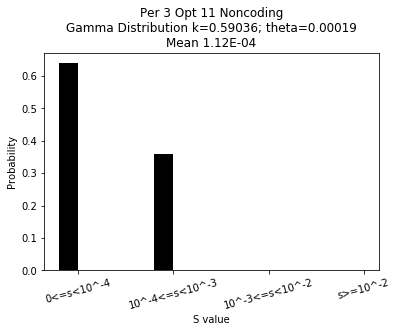

13361


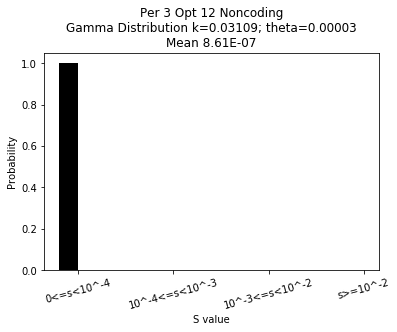

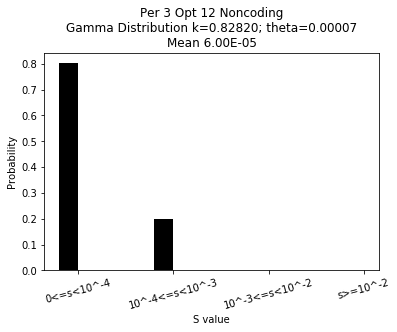

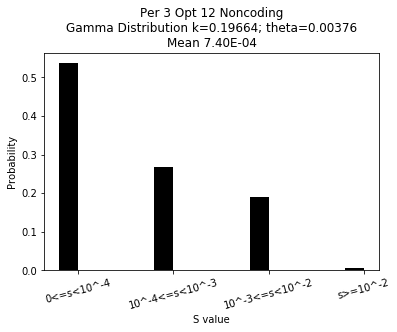

11648


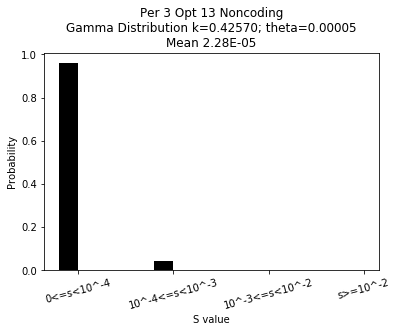

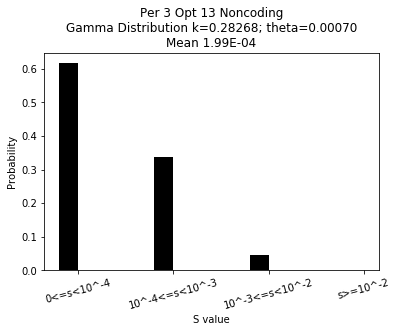

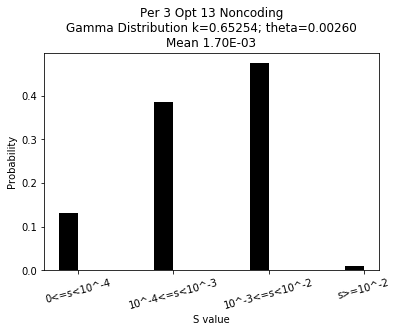

CPU times: user 10.6 s, sys: 213 ms, total: 10.8 s
Wall time: 10.8 s


In [24]:
%%time
if __name__ == '__main__':
    main()